In [1]:
import numpy as np
import pandas as pd

In [2]:
delivery= pd.read_csv('IPL_Ball_by_Ball_2008_2022_New.csv')
match = pd.read_csv('IPL_Matches_2008_2022_New.csv')

In [3]:
match.shape

(950, 20)

In [4]:
delivery

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,RR
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,RR
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,RR
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,RR
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,RR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,RCB
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,RCB
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,RCB
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,RCB


In [5]:
total_score_df = delivery.groupby(['ID','innings']).sum()['total_run'].reset_index()

In [6]:
total_score_df = total_score_df[total_score_df['innings'] == 1]
total_score_df.iloc[:,-1]=total_score_df.iloc[:,-1]+1


In [7]:
total_score_df

,ID,innings,total_run
0,335982,1,223
2,335983,1,241
4,335984,1,130
6,335985,1,166
8,335986,1,111
...,...,...,...
1918,1304116,1,158
1920,1312197,1,189
1922,1312198,1,208
1924,1312199,1,158


In [8]:
match_df = match.merge(total_score_df[['ID','total_run']],left_on='ID',right_on='ID')


In [9]:
match_df

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,total_run
0,1312200,Ahmedabad,29-05-2022,2022,Final,RR,GT,"Narendra Modi Stadium, Ahmedabad",RR,bat,...,GT,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,131
1,1312199,Ahmedabad,27-05-2022,2022,Qualifier 2,RCB,RR,"Narendra Modi Stadium, Ahmedabad",RR,field,...,RR,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,158
2,1312198,Kolkata,25-05-2022,2022,Eliminator,RCB,LSG,"Eden Gardens, Kolkata",LSG,field,...,RCB,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,208
3,1312197,Kolkata,24-05-2022,2022,Qualifier 1,RR,GT,"Eden Gardens, Kolkata",GT,field,...,GT,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,189
4,1304116,Mumbai,22-05-2022,2022,70,SRH,PBKS,"Wankhede Stadium, Mumbai",SRH,bat,...,PBKS,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,20-04-2008,2007/08,4,KKR,SRH,Eden Gardens,SRH,bat,...,KKR,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan,111
946,335985,Mumbai,20-04-2008,2007/08,5,MI,RCB,Wankhede Stadium,MI,bat,...,RCB,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper,166
947,335984,Delhi,19-04-2008,2007/08,3,DC,RR,Feroz Shah Kotla,RR,bat,...,DC,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar,130
948,335983,Chandigarh,19-04-2008,2007/08,2,PBKS,CSK,"Punjab Cricket Association Stadium, Mohali",CSK,bat,...,CSK,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri,241


In [10]:
match_df['Team1'].unique()

array(['RR', 'RCB', 'SRH', 'DC', 'CSK', 'GT', 'LSG', 'KKR', 'PBKS', 'MI',
       'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Kochi Tuskers Kerala'],
      dtype=object)

In [11]:
teams=[
    'MI','CSK','SRH','GT','RCB','KKR','PBKS','DC','LSG','RR'
]

In [12]:
# match_df['Team1']=match_df['Team1'].str.replace('Delhi Daredevils','Delhi Capitals')
# match_df['Team1']=match_df['Team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
# match_df['Team1']=match_df['Team1'].str.replace('Kings XI Punjab','Punjab Kings')

In [13]:
match_df = match_df[match_df['Team1'].isin(teams)]
match_df = match_df[match_df['Team2'].isin(teams)]

In [14]:
match_df=match_df[match_df['WonBy']!='NoResults']


In [15]:
match_df=match_df[['ID','City','Team1','Team2','WinningTeam','total_run']]


In [16]:
match_df

,ID,City,Team1,Team2,WinningTeam,total_run
0,1312200,Ahmedabad,RR,GT,GT,131
1,1312199,Ahmedabad,RCB,RR,RR,158
2,1312198,Kolkata,RCB,LSG,RCB,208
3,1312197,Kolkata,RR,GT,GT,189
4,1304116,Mumbai,SRH,PBKS,PBKS,158
...,...,...,...,...,...,...
945,335986,Kolkata,KKR,SRH,KKR,111
946,335985,Mumbai,MI,RCB,RCB,166
947,335984,Delhi,DC,RR,DC,130
948,335983,Chandigarh,PBKS,CSK,CSK,241


In [17]:
delivery_df = match_df.merge(delivery,on='ID')


In [18]:
delivery_df = delivery_df[delivery_df['innings'] == 2]


In [19]:
# delivery_df['BowlingTeam'] = (delivery_df['Team1']+delivery_df['Team2'])

In [20]:
delivery_df['BowlingTeam']= delivery_df.apply(lambda x: (x['Team1']+ x['Team2']).replace(str(x['BattingTeam']),''),axis=1)



In [21]:
delivery_df

,ID,City,Team1,Team2,WinningTeam,total_run_x,innings,overs,ballnumber,batter,...,batsman_run,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam
120,1312200,Ahmedabad,RR,GT,GT,131,2,0,1,WP Saha,...,0,0,0,0,0,NaN,NaN,NaN,GT,RR
121,1312200,Ahmedabad,RR,GT,GT,131,2,0,2,WP Saha,...,0,0,0,0,0,NaN,NaN,NaN,GT,RR
122,1312200,Ahmedabad,RR,GT,GT,131,2,0,3,WP Saha,...,1,0,1,0,0,NaN,NaN,NaN,GT,RR
123,1312200,Ahmedabad,RR,GT,GT,131,2,0,4,Shubman Gill,...,0,0,0,0,0,NaN,NaN,NaN,GT,RR
124,1312200,Ahmedabad,RR,GT,GT,131,2,0,5,Shubman Gill,...,0,0,0,0,0,NaN,NaN,NaN,GT,RR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198621,335982,Bengaluru,RCB,KKR,KKR,223,2,14,5,P Kumar,...,0,1,1,0,0,NaN,NaN,NaN,RCB,KKR
198622,335982,Bengaluru,RCB,KKR,KKR,223,2,14,6,SB Joshi,...,1,0,1,0,0,NaN,NaN,NaN,RCB,KKR
198623,335982,Bengaluru,RCB,KKR,KKR,223,2,14,7,P Kumar,...,0,0,0,0,0,NaN,NaN,NaN,RCB,KKR
198624,335982,Bengaluru,RCB,KKR,KKR,223,2,15,1,SB Joshi,...,0,1,1,0,0,NaN,NaN,NaN,RCB,KKR


In [22]:
delivery_df['current_score'] = delivery_df.groupby('ID')['total_run_y'].cumsum()


In [23]:
delivery_df['BattingTeam'].dtypes

dtype('O')

In [24]:
delivery_df

,ID,City,Team1,Team2,WinningTeam,total_run_x,innings,overs,ballnumber,batter,...,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam,current_score
120,1312200,Ahmedabad,RR,GT,GT,131,2,0,1,WP Saha,...,0,0,0,0,NaN,NaN,NaN,GT,RR,0
121,1312200,Ahmedabad,RR,GT,GT,131,2,0,2,WP Saha,...,0,0,0,0,NaN,NaN,NaN,GT,RR,0
122,1312200,Ahmedabad,RR,GT,GT,131,2,0,3,WP Saha,...,0,1,0,0,NaN,NaN,NaN,GT,RR,1
123,1312200,Ahmedabad,RR,GT,GT,131,2,0,4,Shubman Gill,...,0,0,0,0,NaN,NaN,NaN,GT,RR,1
124,1312200,Ahmedabad,RR,GT,GT,131,2,0,5,Shubman Gill,...,0,0,0,0,NaN,NaN,NaN,GT,RR,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198621,335982,Bengaluru,RCB,KKR,KKR,223,2,14,5,P Kumar,...,1,1,0,0,NaN,NaN,NaN,RCB,KKR,80
198622,335982,Bengaluru,RCB,KKR,KKR,223,2,14,6,SB Joshi,...,0,1,0,0,NaN,NaN,NaN,RCB,KKR,81
198623,335982,Bengaluru,RCB,KKR,KKR,223,2,14,7,P Kumar,...,0,0,0,0,NaN,NaN,NaN,RCB,KKR,81
198624,335982,Bengaluru,RCB,KKR,KKR,223,2,15,1,SB Joshi,...,1,1,0,0,NaN,NaN,NaN,RCB,KKR,82


In [25]:
delivery_df['runs_left'] = delivery_df['total_run_x'] - delivery_df['current_score']


In [26]:
delivery_df

,ID,City,Team1,Team2,WinningTeam,total_run_x,innings,overs,ballnumber,batter,...,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam,current_score,runs_left
120,1312200,Ahmedabad,RR,GT,GT,131,2,0,1,WP Saha,...,0,0,0,NaN,NaN,NaN,GT,RR,0,131
121,1312200,Ahmedabad,RR,GT,GT,131,2,0,2,WP Saha,...,0,0,0,NaN,NaN,NaN,GT,RR,0,131
122,1312200,Ahmedabad,RR,GT,GT,131,2,0,3,WP Saha,...,1,0,0,NaN,NaN,NaN,GT,RR,1,130
123,1312200,Ahmedabad,RR,GT,GT,131,2,0,4,Shubman Gill,...,0,0,0,NaN,NaN,NaN,GT,RR,1,130
124,1312200,Ahmedabad,RR,GT,GT,131,2,0,5,Shubman Gill,...,0,0,0,NaN,NaN,NaN,GT,RR,1,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198621,335982,Bengaluru,RCB,KKR,KKR,223,2,14,5,P Kumar,...,1,0,0,NaN,NaN,NaN,RCB,KKR,80,143
198622,335982,Bengaluru,RCB,KKR,KKR,223,2,14,6,SB Joshi,...,1,0,0,NaN,NaN,NaN,RCB,KKR,81,142
198623,335982,Bengaluru,RCB,KKR,KKR,223,2,14,7,P Kumar,...,0,0,0,NaN,NaN,NaN,RCB,KKR,81,142
198624,335982,Bengaluru,RCB,KKR,KKR,223,2,15,1,SB Joshi,...,1,0,0,NaN,NaN,NaN,RCB,KKR,82,141


In [27]:
delivery_df['balls_left'] = 126 - (delivery_df['overs']*6 + delivery_df['ballnumber'])

In [28]:
delivery_df

,ID,City,Team1,Team2,WinningTeam,total_run_x,innings,overs,ballnumber,batter,...,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam,current_score,runs_left,balls_left
120,1312200,Ahmedabad,RR,GT,GT,131,2,0,1,WP Saha,...,0,0,NaN,NaN,NaN,GT,RR,0,131,125
121,1312200,Ahmedabad,RR,GT,GT,131,2,0,2,WP Saha,...,0,0,NaN,NaN,NaN,GT,RR,0,131,124
122,1312200,Ahmedabad,RR,GT,GT,131,2,0,3,WP Saha,...,0,0,NaN,NaN,NaN,GT,RR,1,130,123
123,1312200,Ahmedabad,RR,GT,GT,131,2,0,4,Shubman Gill,...,0,0,NaN,NaN,NaN,GT,RR,1,130,122
124,1312200,Ahmedabad,RR,GT,GT,131,2,0,5,Shubman Gill,...,0,0,NaN,NaN,NaN,GT,RR,1,130,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198621,335982,Bengaluru,RCB,KKR,KKR,223,2,14,5,P Kumar,...,0,0,NaN,NaN,NaN,RCB,KKR,80,143,37
198622,335982,Bengaluru,RCB,KKR,KKR,223,2,14,6,SB Joshi,...,0,0,NaN,NaN,NaN,RCB,KKR,81,142,36
198623,335982,Bengaluru,RCB,KKR,KKR,223,2,14,7,P Kumar,...,0,0,NaN,NaN,NaN,RCB,KKR,81,142,35
198624,335982,Bengaluru,RCB,KKR,KKR,223,2,15,1,SB Joshi,...,0,0,NaN,NaN,NaN,RCB,KKR,82,141,35


In [29]:
delivery_df['player_out'] = delivery_df['player_out'].fillna("0")
delivery_df['player_out'] = delivery_df['player_out'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_out'] = delivery_df['player_out'].astype('int')


In [30]:
wickets = delivery_df.groupby('ID')['player_out'].cumsum().values

In [31]:
delivery_df['wickets'] = 10 - wickets

In [32]:
delivery_df

,ID,City,Team1,Team2,WinningTeam,total_run_x,innings,overs,ballnumber,batter,...,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam,current_score,runs_left,balls_left,wickets
120,1312200,Ahmedabad,RR,GT,GT,131,2,0,1,WP Saha,...,0,0,NaN,NaN,GT,RR,0,131,125,10
121,1312200,Ahmedabad,RR,GT,GT,131,2,0,2,WP Saha,...,0,0,NaN,NaN,GT,RR,0,131,124,10
122,1312200,Ahmedabad,RR,GT,GT,131,2,0,3,WP Saha,...,0,0,NaN,NaN,GT,RR,1,130,123,10
123,1312200,Ahmedabad,RR,GT,GT,131,2,0,4,Shubman Gill,...,0,0,NaN,NaN,GT,RR,1,130,122,10
124,1312200,Ahmedabad,RR,GT,GT,131,2,0,5,Shubman Gill,...,0,0,NaN,NaN,GT,RR,1,130,121,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198621,335982,Bengaluru,RCB,KKR,KKR,223,2,14,5,P Kumar,...,0,0,NaN,NaN,RCB,KKR,80,143,37,1
198622,335982,Bengaluru,RCB,KKR,KKR,223,2,14,6,SB Joshi,...,0,0,NaN,NaN,RCB,KKR,81,142,36,1
198623,335982,Bengaluru,RCB,KKR,KKR,223,2,14,7,P Kumar,...,0,0,NaN,NaN,RCB,KKR,81,142,35,1
198624,335982,Bengaluru,RCB,KKR,KKR,223,2,15,1,SB Joshi,...,0,0,NaN,NaN,RCB,KKR,82,141,35,1


In [33]:
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])


In [34]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']


In [35]:
import math
delivery_df['crr'] = delivery_df['crr'].apply(lambda x:0.0 if math.isinf(x) else x)

In [36]:
import math
delivery_df['rrr'] = delivery_df['rrr'].apply(lambda x:0.0 if math.isinf(x) else x)

In [37]:
def result(row):
    return 1 if row['BattingTeam'] == row['WinningTeam'] else 0

In [38]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [39]:
delivery_df

,ID,City,Team1,Team2,WinningTeam,total_run_x,innings,overs,ballnumber,batter,...,fielders_involved,BattingTeam,BowlingTeam,current_score,runs_left,balls_left,wickets,crr,rrr,result
120,1312200,Ahmedabad,RR,GT,GT,131,2,0,1,WP Saha,...,NaN,GT,RR,0,131,125,10,-0.000000,6.288000,1
121,1312200,Ahmedabad,RR,GT,GT,131,2,0,2,WP Saha,...,NaN,GT,RR,0,131,124,10,-0.000000,6.338710,1
122,1312200,Ahmedabad,RR,GT,GT,131,2,0,3,WP Saha,...,NaN,GT,RR,1,130,123,10,-2.000000,6.341463,1
123,1312200,Ahmedabad,RR,GT,GT,131,2,0,4,Shubman Gill,...,NaN,GT,RR,1,130,122,10,-3.000000,6.393443,1
124,1312200,Ahmedabad,RR,GT,GT,131,2,0,5,Shubman Gill,...,NaN,GT,RR,1,130,121,10,-6.000000,6.446281,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198621,335982,Bengaluru,RCB,KKR,KKR,223,2,14,5,P Kumar,...,NaN,RCB,KKR,80,143,37,1,5.783133,23.189189,0
198622,335982,Bengaluru,RCB,KKR,KKR,223,2,14,6,SB Joshi,...,NaN,RCB,KKR,81,142,36,1,5.785714,23.666667,0
198623,335982,Bengaluru,RCB,KKR,KKR,223,2,14,7,P Kumar,...,NaN,RCB,KKR,81,142,35,1,5.717647,24.342857,0
198624,335982,Bengaluru,RCB,KKR,KKR,223,2,15,1,SB Joshi,...,NaN,RCB,KKR,82,141,35,1,5.788235,24.171429,0


In [40]:
final_df = delivery_df[['BattingTeam','BowlingTeam','City','runs_left','balls_left','wickets','total_run_x','crr','rrr','result']]


In [41]:
final_df

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets,total_run_x,crr,rrr,result
120,GT,RR,Ahmedabad,131,125,10,131,-0.000000,6.288000,1
121,GT,RR,Ahmedabad,131,124,10,131,-0.000000,6.338710,1
122,GT,RR,Ahmedabad,130,123,10,131,-2.000000,6.341463,1
123,GT,RR,Ahmedabad,130,122,10,131,-3.000000,6.393443,1
124,GT,RR,Ahmedabad,130,121,10,131,-6.000000,6.446281,1
...,...,...,...,...,...,...,...,...,...,...
198621,RCB,KKR,Bengaluru,143,37,1,223,5.783133,23.189189,0
198622,RCB,KKR,Bengaluru,142,36,1,223,5.785714,23.666667,0
198623,RCB,KKR,Bengaluru,142,35,1,223,5.717647,24.342857,0
198624,RCB,KKR,Bengaluru,141,35,1,223,5.788235,24.171429,0


In [42]:
final_df = final_df.sample(final_df.shape[0])


In [43]:
final_df.sample()


,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets,total_run_x,crr,rrr,result
107820,RCB,CSK,Ranchi,123,100,9,139,4.8,7.38,1


In [44]:
final_df = final_df[final_df['balls_left'] != 0]


In [45]:
final_df = final_df.dropna()

In [46]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]

# X=
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False),['BattingTeam','BowlingTeam','City'])
]
,remainder='passthrough')

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [49]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [50]:
final_df.isna().sum()

BattingTeam    0
BowlingTeam    0
City           0
runs_left      0
balls_left     0
wickets        0
total_run_x    0
crr            0
rrr            0
result         0
dtype: int64

In [51]:
X_train

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets,total_run_x,crr,rrr
105203,CSK,RCB,Bengaluru,72,73,9,155,10.595745,5.917808
76470,MI,PBKS,Mumbai,164,92,10,231,14.357143,10.695652
122068,RR,PBKS,Chandigarh,111,94,9,146,8.076923,7.085106
38419,PBKS,MI,Sharjah,100,68,8,177,8.884615,8.823529
45114,KKR,SRH,Abu Dhabi,69,64,7,143,7.928571,6.468750
...,...,...,...,...,...,...,...,...,...
100882,CSK,MI,Mumbai,52,59,8,184,12.983607,5.288136
4461,MI,KKR,Navi Mumbai,160,118,9,166,18.000000,8.135593
61351,CSK,SRH,Mumbai,83,59,9,179,9.442623,8.440678
71604,RR,CSK,Pune,147,77,7,205,8.093023,11.454545


In [52]:
X_test

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets,total_run_x,crr,rrr
119968,DC,PBKS,Dharamsala,14,8,4,172,8.464286,10.500000
173460,RCB,DC,Johannesburg,9,17,7,135,7.339806,3.176471
180150,KKR,MI,East London,141,111,8,149,5.333333,7.621622
68926,KKR,RCB,Bengaluru,159,115,10,176,20.400000,8.295652
13781,RCB,MI,Pune,30,29,9,152,8.043956,6.206897
...,...,...,...,...,...,...,...,...,...
76462,MI,PBKS,Mumbai,189,100,10,231,12.600000,11.340000
19060,RCB,DC,Dubai,140,100,8,165,7.500000,8.400000
72870,CSK,PBKS,Chandigarh,16,11,5,198,10.018349,8.727273
133629,RCB,SRH,Hyderabad,82,80,8,133,7.650000,6.150000


In [53]:

pipe.fit(X_train,y_train)

c:\Users\golla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(sparse=False),
                                                  ['BattingTeam', 'BowlingTeam',
                                                   'City'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [54]:
y_pred = pipe.predict(X_test)
print(y_pred)


[0 1 0 ... 1 1 0]


In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8073494917904613

In [56]:
pipe.predict_proba(X_test)[10]

array([0.37995418, 0.62004582])

In [57]:
def match_summary(row):
    print("Batting Team-" + row['BattingTeam'] + " | Bowling Team-" + row['BowlingTeam'] + " | Target- " + str(row['total_run_x']))
    

In [58]:
 delivery_df.head()

,ID,City,Team1,Team2,WinningTeam,total_run_x,innings,overs,ballnumber,batter,...,fielders_involved,BattingTeam,BowlingTeam,current_score,runs_left,balls_left,wickets,crr,rrr,result
120,1312200,Ahmedabad,RR,GT,GT,131,2,0,1,WP Saha,...,NaN,GT,RR,0,131,125,10,-0.0,6.288000,1
121,1312200,Ahmedabad,RR,GT,GT,131,2,0,2,WP Saha,...,NaN,GT,RR,0,131,124,10,-0.0,6.338710,1
122,1312200,Ahmedabad,RR,GT,GT,131,2,0,3,WP Saha,...,NaN,GT,RR,1,130,123,10,-2.0,6.341463,1
123,1312200,Ahmedabad,RR,GT,GT,131,2,0,4,Shubman Gill,...,NaN,GT,RR,1,130,122,10,-3.0,6.393443,1
124,1312200,Ahmedabad,RR,GT,GT,131,2,0,5,Shubman Gill,...,NaN,GT,RR,1,130,121,10,-6.0,6.446281,1


In [59]:

def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['ID'] == match_id]
    match = match[(match['ballnumber'] == 6)]
    temp_df = match[['ID','BattingTeam','BowlingTeam','City','runs_left','balls_left','wickets','total_run_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    # print(temp_df.head())
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_run_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [60]:

temp_df,target =match_progression(delivery_df,1304115,pipe)
temp_df

Target- 160


,end_of_over,runs_after_over,wickets_in_over,lose,win
1330,1,1,0,26.8,73.2
1336,2,14,0,18.7,81.3
1342,3,1,0,21.7,78.3
1349,4,8,0,19.1,80.9
1355,5,1,0,22.7,77.3
1361,6,2,1,38.9,61.1
1367,7,6,0,38.5,61.5
1373,8,7,0,37.0,63.0
1379,9,4,0,40.4,59.6
1385,10,18,0,23.9,76.1


Text(0.5, 1.0, 'Target-160')

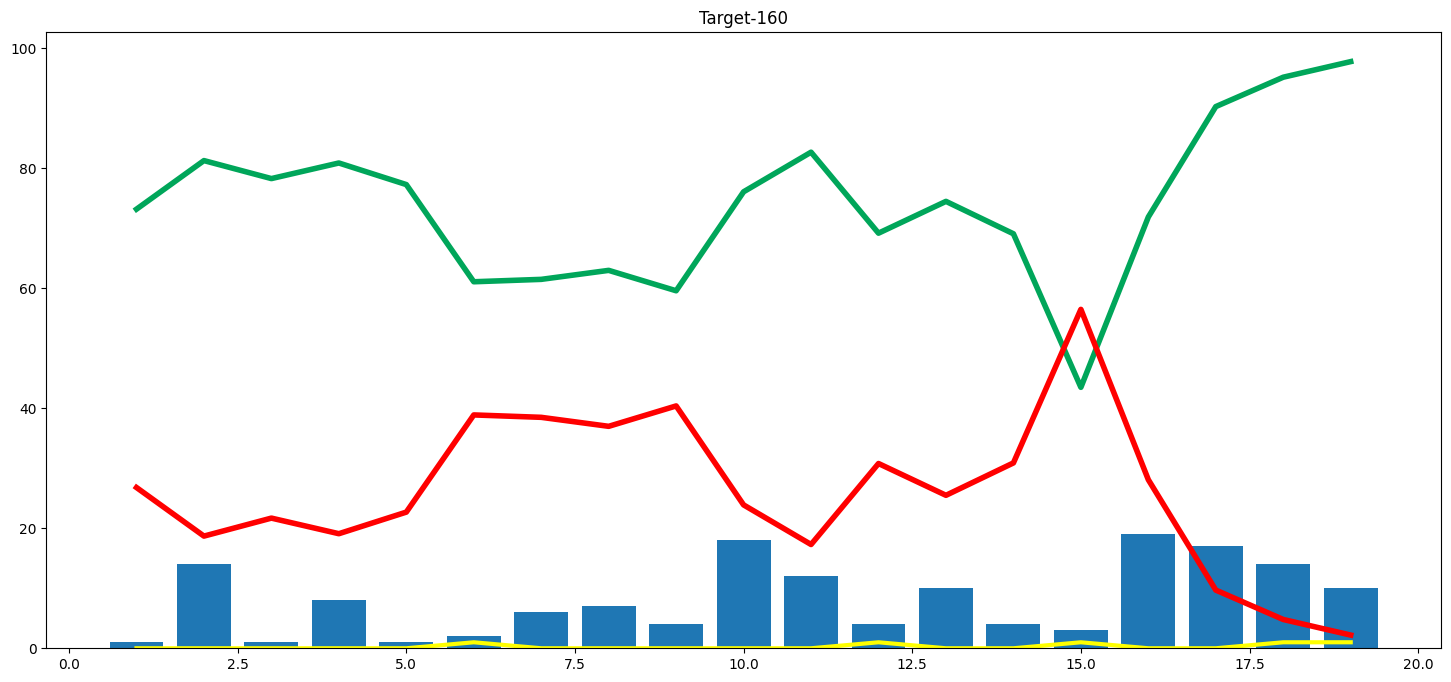

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [62]:
import pickle
pickle.dump(pipe,open('pipeProject.pkl','wb'))

In [63]:
teams

['MI', 'CSK', 'SRH', 'GT', 'RCB', 'KKR', 'PBKS', 'DC', 'LSG', 'RR']

In [64]:
delivery_df['City'].unique()

array(['Ahmedabad', 'Kolkata', 'Mumbai', 'Navi Mumbai', 'Pune', 'Dubai',
       'Sharjah', 'Abu Dhabi', 'Delhi', 'Chennai', 'Hyderabad',
       'Visakhapatnam', 'Chandigarh', 'Bengaluru', 'Jaipur', 'Indore',
       'Raipur', 'Ranchi', 'Cuttack', 'Dharamsala', 'Nagpur',
       'Johannesburg', 'Centurion', 'Durban', 'Bloemfontein',
       'Port Elizabeth', 'Kimberley', 'East London', 'Cape Town'],
      dtype=object)

In [65]:
X

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets,total_run_x,crr,rrr
13213,LSG,RR,Mumbai,148,104,7,166,6.750000,8.538462
191308,SRH,KKR,Hyderabad,64,27,4,205,9.096774,14.222222
174626,SRH,KKR,Johannesburg,108,84,10,161,8.833333,7.714286
133176,DC,KKR,Pune,54,37,6,163,7.879518,8.756757
116730,DC,KKR,Sharjah,0,9,4,167,9.027027,0.000000
...,...,...,...,...,...,...,...,...,...
49657,PBKS,SRH,Hyderabad,195,111,9,213,12.000000,10.540541
170684,CSK,SRH,Chennai,159,95,7,191,7.680000,10.042105
141852,RCB,PBKS,Chandigarh,113,76,7,164,6.954545,8.921053
101644,RR,MI,Ahmedabad,29,27,7,165,8.774194,6.444444


In [66]:
y

13213     0
191308    0
174626    1
133176    0
116730    1
         ..
49657     0
170684    0
141852    1
101644    1
30579     1
Name: result, Length: 95925, dtype: int64